___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv("/content/drive/MyDrive/DL/Assignement/Churn_Modelling.csv")

In [82]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


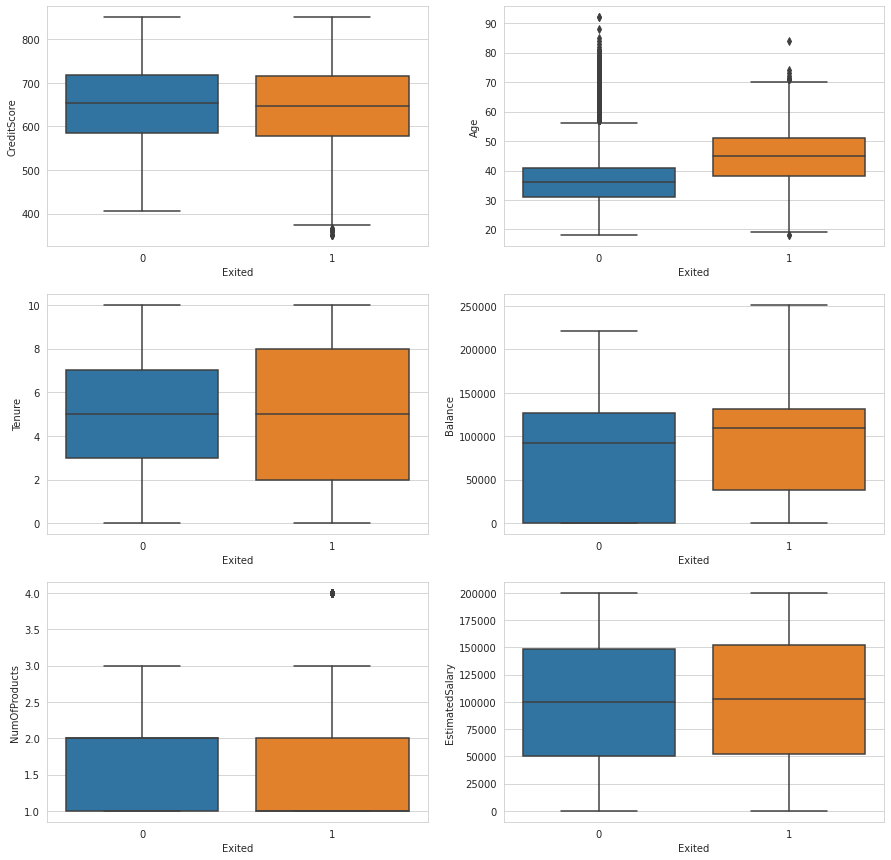

In [85]:
col_names = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in col_names:
    plt.subplot(3,2,col_names.index(i)+1)
    sns.boxplot(y= df[i], x= df["Exited"])

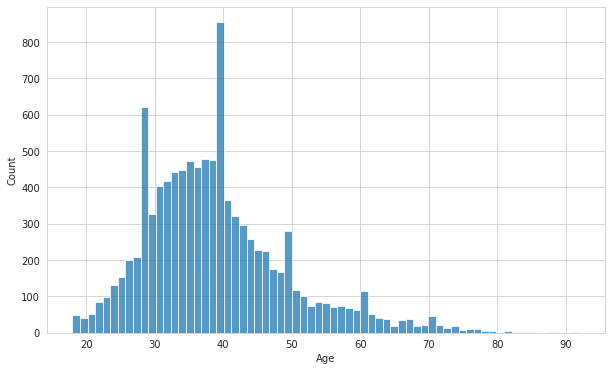

In [86]:
sns.histplot(df.Age);

In [87]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
60     62
59     62
61     53
21     53
62     52
63     40
20     40
64     37
67     37
66     35
71     27
19     27
18     22
69     22
72     21
68     19
74     18
65     18
70     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
82      1
88      1
85      1
83      1
Name: Age, dtype: int64

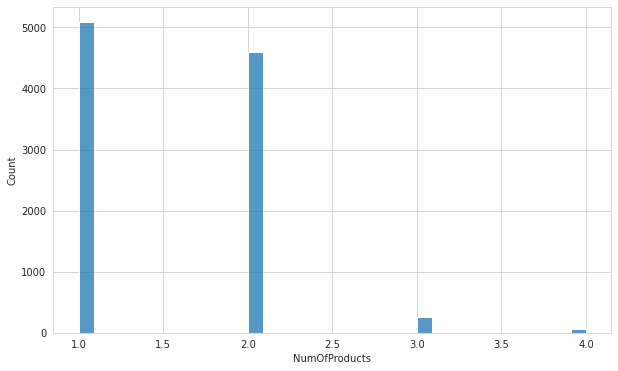

In [88]:
sns.histplot(df.NumOfProducts)

In [89]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [90]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [91]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

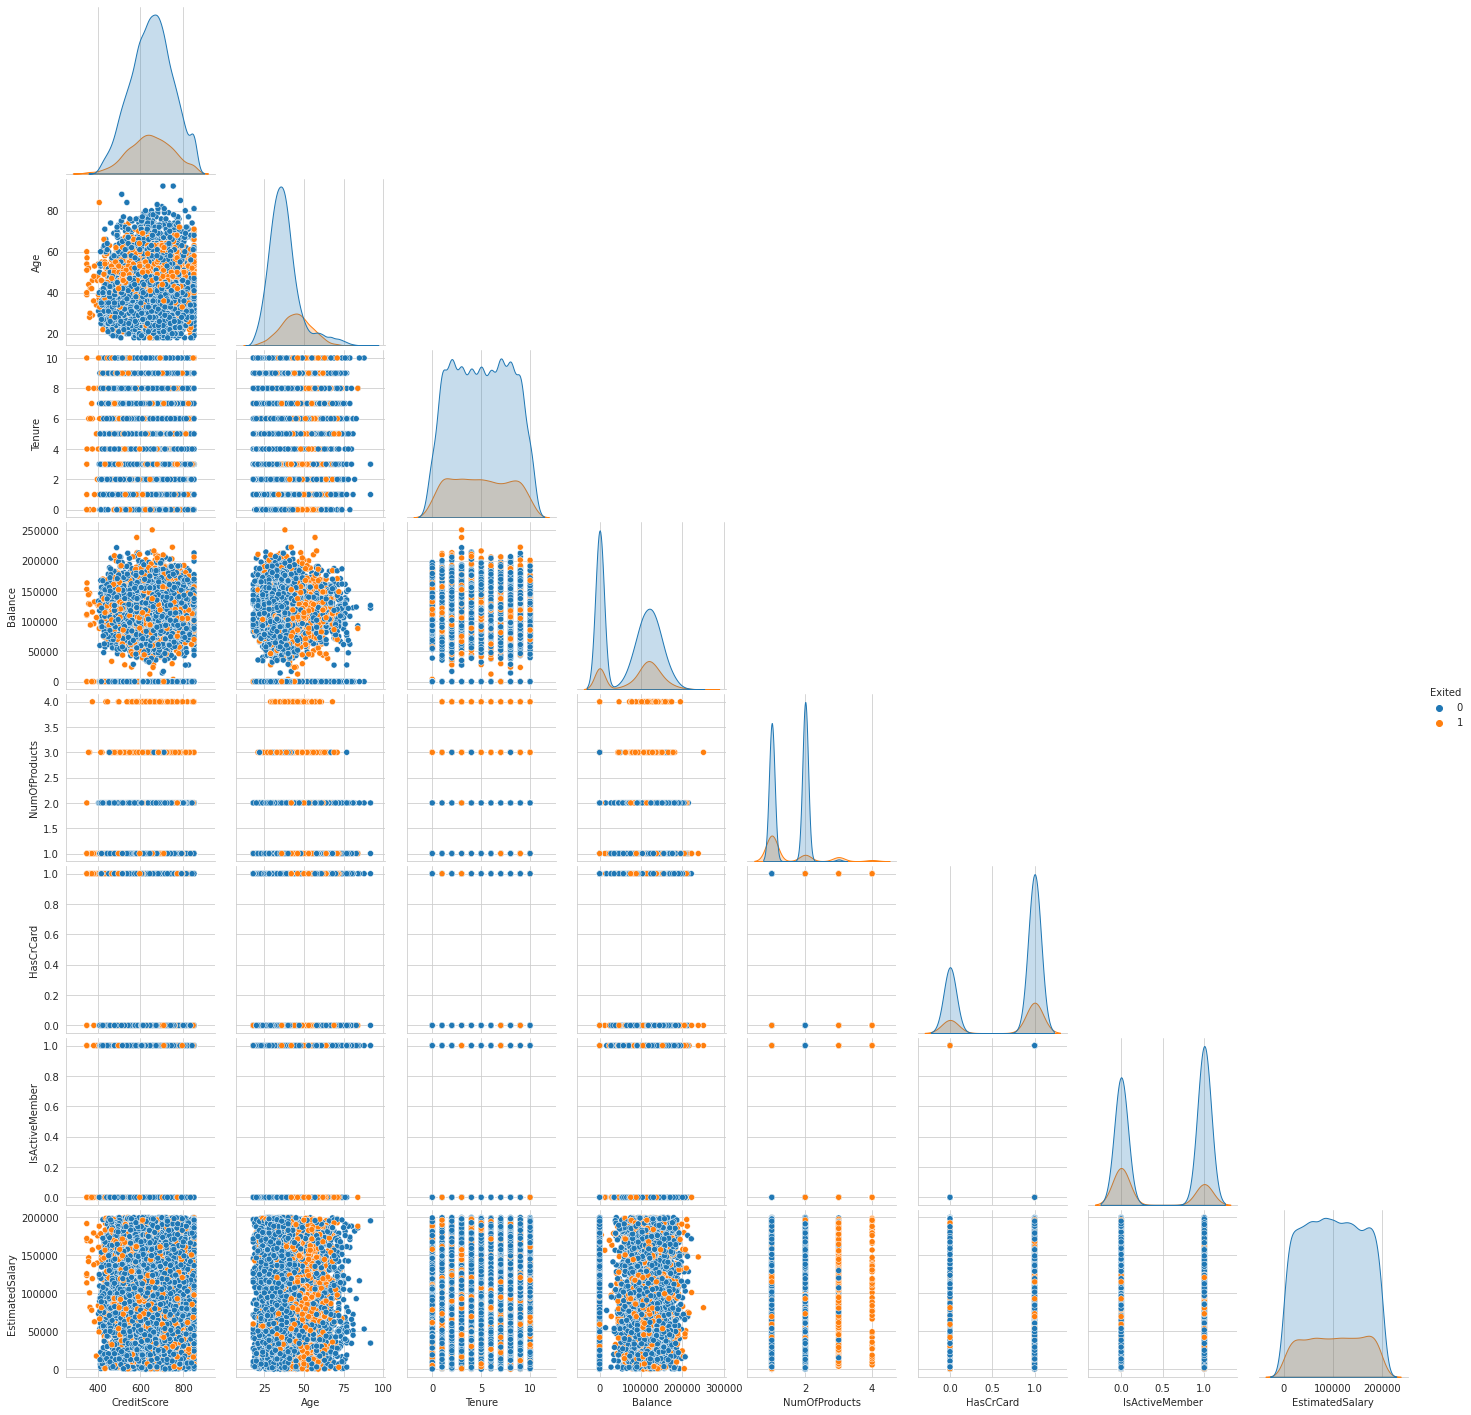

In [92]:
sns.pairplot(data = df, hue = "Exited", corner = True)

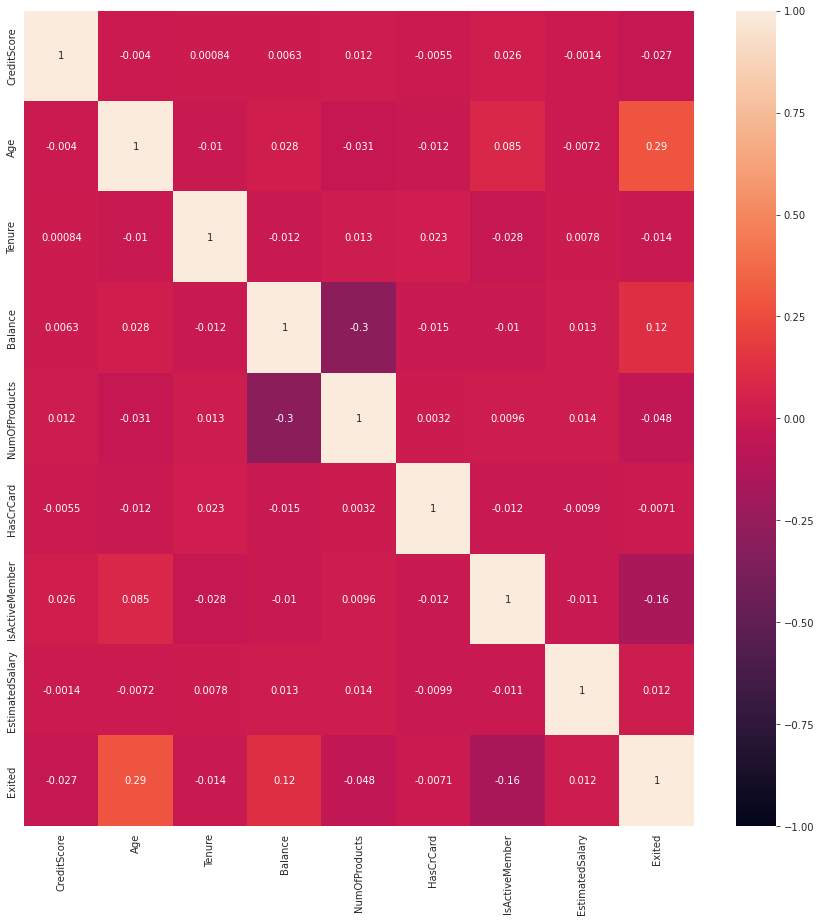

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True ,vmin= -1.0)

In [94]:
df.shape

(10000, 11)

# Preprocessing of Data
- Train | Test Split, Scalling

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [97]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse= False), cat), remainder= MinMaxScaler()
)


In [101]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [102]:
# from sklearn.preprocessing import MinMaxScaler

In [103]:
"""scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit(X_test)"""

'scaler = MinMaxScaler()\n\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.fit(X_test)'

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [105]:
X_train.shape

(8000, 13)

In [106]:
X_test.shape

(2000, 13)

In [109]:
tf.random.set_seed(seed)

tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [110]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1)


Epoch 1/500
57/57 [==============================] - 1s 4ms/step - loss: 0.6374 - accuracy: 0.7185 - val_loss: 0.5425 - val_accuracy: 0.8100
Epoch 2/500
57/57 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7947 - val_loss: 0.4717 - val_accuracy: 0.8100
Epoch 3/500
57/57 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7947 - val_loss: 0.4617 - val_accuracy: 0.8100
Epoch 4/500
57/57 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7947 - val_loss: 0.4563 - val_accuracy: 0.8100
Epoch 5/500
57/57 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7947 - val_loss: 0.4512 - val_accuracy: 0.8100
Epoch 6/500
57/57 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7950 - val_loss: 0.4450 - val_accuracy: 0.8150
Epoch 7/500
57/57 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8033 - val_loss: 0.4380 - val_accuracy: 0.8138
Epoch 8/500
5

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [112]:
loss_df = pd.DataFrame(model.history.history)

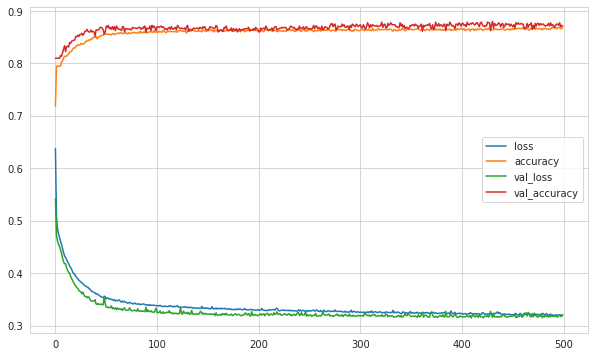

In [113]:
loss_df.plot()

In [114]:
model.evaluate(X_test, y_test, verbose=0)

[0.34658345580101013, 0.8535000085830688]

In [115]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34658345580101013
accuracy:  0.8535000085830688


In [117]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1502   91]
 [ 202  205]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.69      0.50      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___